# Dataset explanation # 
This dataset relates to spinal conditions and includes biomechanical measurements and classification. Here’s a brief explanation of the variables:

### Variables: ###
pelvic_incidence: Describes the angular relationship of the pelvis with the spine.

pelvic_tilt numeric: Measures the anterior or posterior tilt of the pelvis.

lumbar_lordosis_angle: Represents the curvature of the lumbar spine.

sacral_slope: The angle of the sacrum relative to the horizontal plane.

pelvic_radius: Structural feature indicating the size of the pelvis.

degree_spondylolisthesis: Measures the displacement of one vertebra over another.

class: The target variable indicating spinal health:


Abnormal: Spine structure is impaired.
Normal: No spine issues detected.
### Purpose: ###
The goal is to classify individuals as "Normal" or "Abnormal" based on these measurements, aiding in spine disorder diagnosis.

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import warnings 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")



In [3]:
# loading data set 
df = pd.read_csv("column_2C_weka.csv")

df.head()



,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [5]:
df["class"].unique() # to see how many unique categorical values included

array(['Abnormal', 'Normal'], dtype=object)

#### changing normal -> 0 and abnormal -> 1 

In [7]:

df["class"] = [1 if each == "Abnormal" else 0 for each in df["class"]]

print(df["class"].head())
print(df["class"].unique())



0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64
[1 0]


## Correlation Heatmap ## 

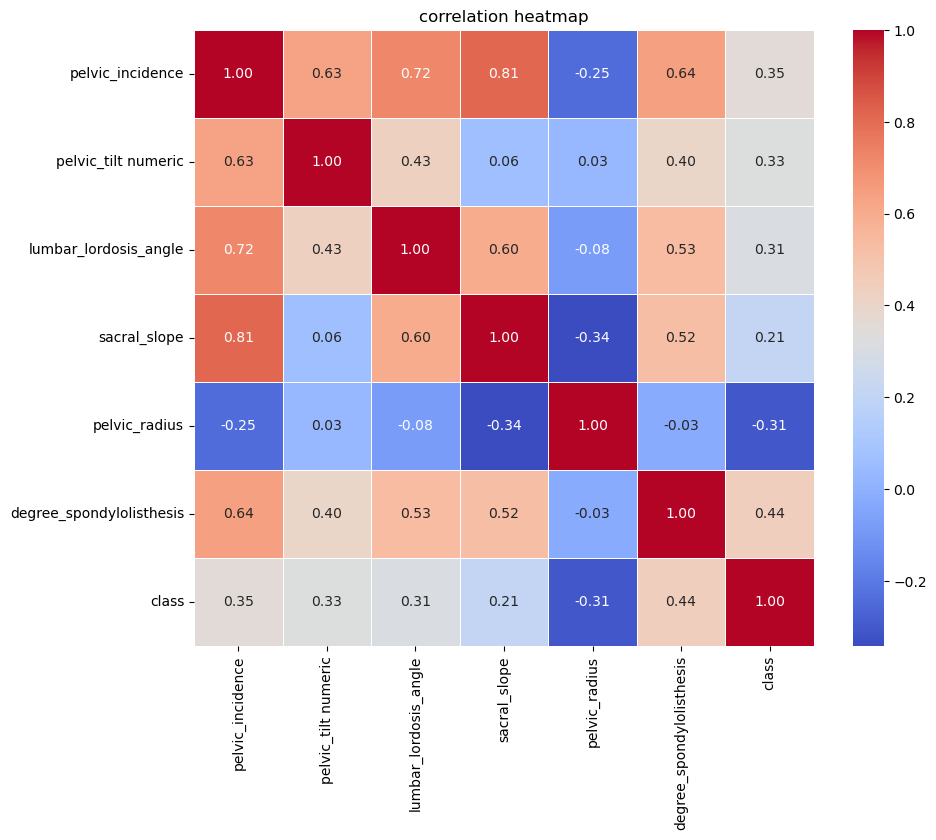

In [9]:
cor_matrix = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(cor_matrix, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5)
plt.title("correlation heatmap")
plt.show()

## Looking for scatter plot ## 

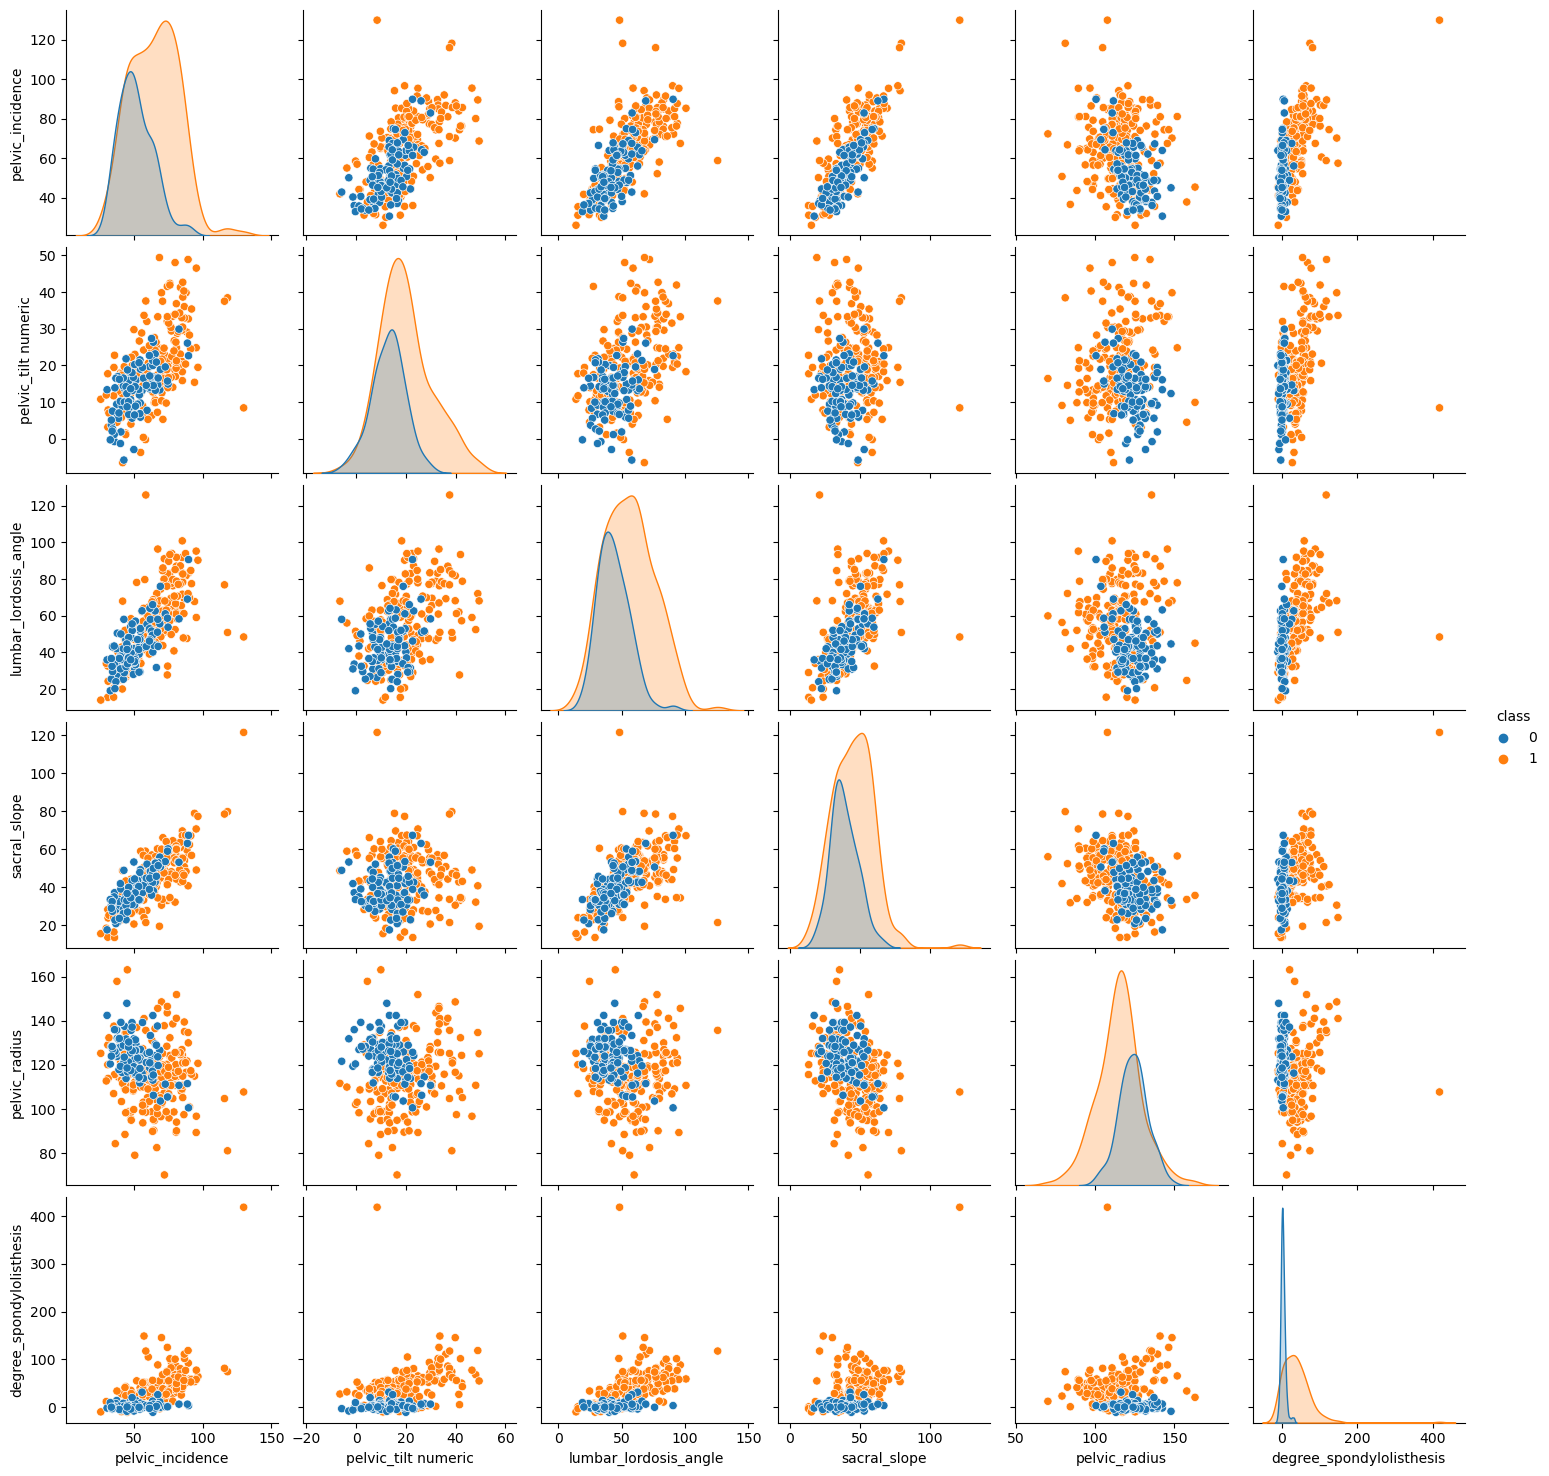

In [11]:
sns.pairplot(df, hue = "class")
plt.show()

bu saçılım grafiklerine bakarak değişkenimizin kategorizasyonu ile ilgili bir çıkarımda bulunamıyoruz çünkü normal ve abnormal durumları için diğer metrikler ayrıştırılabilir değiller.  

## splitting data and solving problem with K-nearest neighbor algorithm 

In [14]:
# specify x and y
y = df["class"].values # target
x_data = df.drop(["class"], axis = 1)

### Normalize Data

In [20]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))
x.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.172453,0.078237,0.117940,0.119956,0.255425,0.025148
1,0.116655,0.049160,0.083970,0.093236,0.292047,0.036365
2,0.185964,0.077459,0.142342,0.134245,0.272446,0.017523
3,0.187046,0.083126,0.128886,0.129660,0.262864,0.051838
4,0.141459,0.048208,0.091656,0.118992,0.277529,0.044173


In [22]:
# %15 test %85 train
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, random_state = 42)

In [24]:
# KNN model 
from sklearn.neighbors import KNeighborsClassifier 

neighbor_size = 4
knn_model = KNeighborsClassifier(n_neighbors = neighbor_size)
knn_model.fit(x_train, y_train)

prediction = knn_model.predict(x_test)

print("for", neighbor_size,"neighbor size accuracy : ", knn_model.score(x_test, y_test))
# burada aynı zamanda doğrudan tahminleme yapıyoruz prediction değişkeni ile bağımsız.


for 4 neighbor size accuracy :  0.8723404255319149


### finding the best K value ###

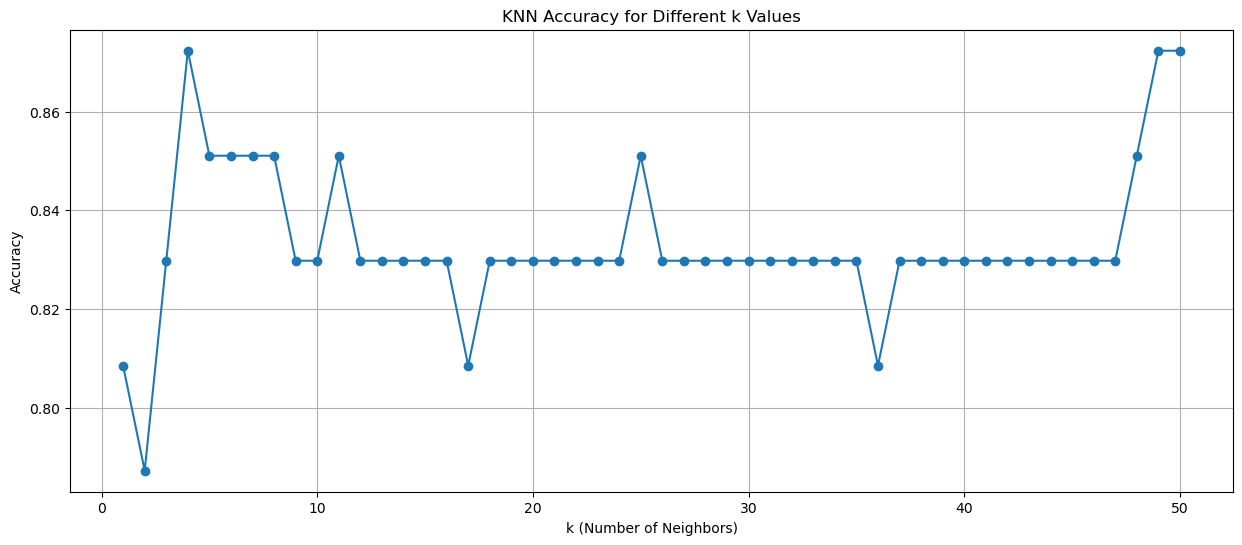

best k value and score : 4 ,  0.8723404255319149


In [26]:

accuracy_list = []
for i in range(1,51):
    best_knn_model = KNeighborsClassifier(n_neighbors = i)
    best_knn_model.fit(x_train, y_train)
    accuracy_list.append(best_knn_model.score(x_test, y_test))
    
plt.figure(figsize=(15, 6))
plt.plot(range(1,51), accuracy_list, marker='o', linestyle='-')
plt.title('KNN Accuracy for Different k Values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

print("best k value and score : 4 , ",max(accuracy_list))